In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
video_dir = 'datasets/mp4/'
json_dir = 'datasets/data/'
label_dir = 'datasets/cfg/'
list_file = 'datafiles.txt'

In [3]:
import numpy as np
import pandas as pd
import os
with open(list_file,'w') as datafiles:
    filelist = os.listdir(video_dir)
    for i in filelist:
        datafiles.write(i[:-4]+',')

/tmp/ipykernel_168168/928358766.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
filelist = []
with open(list_file,'r') as file:
    line = file.readline()
    filelist = line.split(',')

In [5]:
import cv2 as cv

cap = cv.VideoCapture(video_dir + filelist[0]+'.mp4')

motion = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    motion.append(img)

    cv.imshow('frame', img)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.waitKey()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting ...


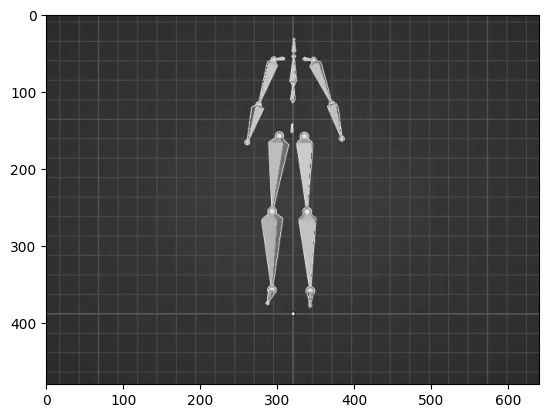

In [10]:
plt.imshow(motion[0],cmap='gray')

In [7]:
cv.imwrite('temp.png', motion[0])
img = cv.imread("temp.png")
#plt.imshow(img,cmap='gray')
#print(type(img))
#print(img)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 48, 48, ..., 48, 48,  0],
       [ 0, 48, 48, ..., 47, 48,  0],
       ...,
       [ 0, 48, 47, ..., 50, 47,  0],
       [ 0, 48, 48, ..., 48, 48,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

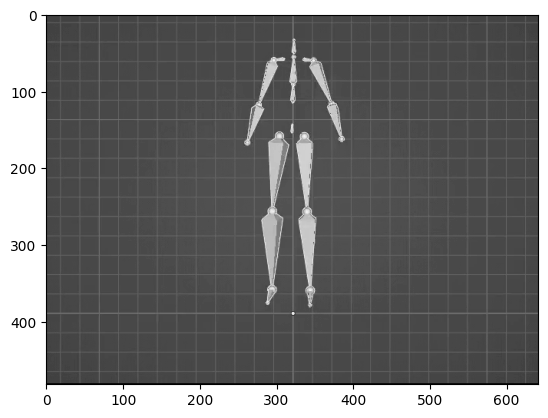

In [12]:
PaddingImage = np.pad(motion[0],((1,1),(1,1)))
plt.imshow(PaddingImage,cmap='gray')
PaddingImage

In [ ]:
#Con_kernel = [1,1,1,1,1,1,1,1,1]
#Con_kernel = [1,1,1,1,2,1,1,1,1] #sharper
Con_kernel = [1,2,1,2,4,2,1,2,1]

#Con_kernel = [0,-1,0,-1,5,-1,0,-1,0]
#Con_kernel = [-1,-1,-1,-1,9,-1,-1,-1,-1] 
#Con_kernel = [1,-2,1,-2,5,-2,1,-2,1] 

#Con_kernel = [-1,0,-1,0,4,0,-1,0,-1]
#Con_kernel = [-1,-1,-1,-1,8,-1,-1,-1,-1]

#Con_kernel = [-1,0,1,-2,0,2,-1,0,1]
#Con_kernel = [1,2,1,0,0,0,-1,-2,-1]
#Con_kernel = [2,1,0,1,0,-1,0,-1,-2]

In [15]:
print(PaddingImage.shape)
img_width = PaddingImage.shape[0]
img_height =PaddingImage.shape[1]
print(img_width,img_height)

(482, 642)
642 482


In [ ]:
Pixel_list = []
tmp = [[-1,-1],[-1, 0],[-1, 1],
       [ 0,-1],[ 0, 0],[ 0, 1],
       [ 1,-1],[ 1, 0],[ 1, 1]]

for i in range(1,img_width):
    for j in range(1,img_height):
        neighbourlist = []
        for k in range(0,9):
            neighbourlist.append(PaddingGreyTestImage[i+tmp[k][0]][j+tmp[k][1]] * Con_kernel[k])
        Pixel_list.append(sum(neighbourlist))

conv_image = np.array(Pixel_list).reshape(512,512)